# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają na celu wyłapać podstawowe błędy. Przejście przez kod wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem). Rozmiar poziomy figur nie powinien przekraczać 20 cali.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu: IAD13
Członkowie: Zuzanna Brauer, Sandra Głowacka, Zuzanna Chmielarska

---

## Zestaw zadań 2: Elementy statystyki opisowej 2 (Notatnik 2/3)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

### Wczytanie danych
Poniższy kod wczytuje do zmiennej `recession_data_1` dane z przygotowanego wcześniej pliku recession_data_1.pkl.

In [3]:
recession_data_1 = pd.read_pickle("recession_data_1.pkl")
recession_data_1

,Country Name,Region Name,Income Group,2006,2007,2008,2009,2010,2011
Country Code,,,,,,,,,
AFG,Afghanistan,Asia,Low,5.357403,13.826320,3.924984,21.390528,14.362441,0.426355
ALB,Albania,Europe,Lower middle,5.902659,5.983260,7.500041,3.354289,3.706938,2.545406
DZA,Algeria,Africa,Upper middle,1.700000,3.400000,2.400000,1.600000,3.600000,2.900000
ASM,American Samoa,Oceania,Upper middle,-4.098361,1.851852,-2.657343,-4.166667,0.299850,0.000000
AND,Andorra,Europe,High,4.808689,1.553188,-5.559186,-5.302847,-1.974958,-0.008070
...,...,...,...,...,...,...,...,...,...
VIR,Virgin Islands (U.S.),Americas,High,3.504993,4.010594,1.218625,-6.594789,0.596383,-8.204246
PSE,West Bank and Gaza,Asia,Lower middle,-0.996556,3.788282,7.429182,8.593491,5.777362,9.600808
YEM,"Yemen, Rep.",Asia,Low,3.170409,3.338428,3.647569,3.866230,7.702307,-12.714897


### Zadnie 2: Prezentacja danych w formie tabelarycznej [10 pkt]

Przygotuj trzy tablice szeregów rodzielczych przedziałowych częstości wskaźnika GDP growth (annual %) dla poszczególnych lat.

Wyświetl przygotowane tablice w taki sposób aby zawarte w tablicy liczby (za wyjątkiem lat i granic przedziałów w nagłówkach kolumn i wierszy) wyświetlały się z dokładnością do 2 miejsca po przecinku.

#### a) Całość danych
Pierwsza tablica (`recession_table_1`) powinna zawierać szeregi skonstruowane w obarciu o całość danych.

 > Indeks: Year </br>
 > Wszystkie lata, dla których zostały wyznaczone wartości parametru GDP growth (annual %)
 
 > Kolumny: (-20, -15],	(-15, -10], ... , (30, 35] </br>
 > Kolejne przedziały wartości zdefiniowane jako `pandas.IntervalIndex`

In [4]:
# YOUR CODE HERE
columns = pd.interval_range(start = -20, end = 35, periods = 11)
recession_table_1 = pd.DataFrame(columns = columns)

for year in range(2006, 2012):
    gdp_freqency = recession_data_1[str(year)].groupby(pd.cut(recession_data_1[str(year)], columns)).count()/recession_data_1[str(year)].groupby(pd.cut(recession_data_1[str(year)], columns)).count().sum()
    recession_table_1 = pd.concat([recession_table_1, gdp_freqency.to_frame().T])

recession_table_1.index.name = 'Year'
recession_table_1.style.format(precision = 2)

,"(-20, -15]","(-15, -10]","(-10, -5]","(-5, 0]","(0, 5]","(5, 10]","(10, 15]","(15, 20]","(20, 25]","(25, 30]","(30, 35]"
Year,,,,,,,,,,,
2006,0.00,0.00,0.01,0.08,0.36,0.47,0.07,0.01,0.00,0.01,0.01
2007,0.00,0.00,0.01,0.03,0.39,0.45,0.09,0.02,0.01,0.00,0.00
2008,0.01,0.01,0.03,0.13,0.45,0.32,0.05,0.01,0.00,0.00,0.00
2009,0.01,0.05,0.13,0.30,0.34,0.14,0.03,0.00,0.01,0.00,0.00
2010,0.00,0.00,0.03,0.09,0.45,0.36,0.06,0.01,0.01,0.01,0.00
2011,0.00,0.01,0.03,0.09,0.48,0.34,0.04,0.01,0.01,0.00,0.00


In [5]:
### Komórka testowa
# Kolumny
lower_boundaries = np.arange(-20, 35, 5)
for i in range(len(lower_boundaries)):
    assert recession_table_1.columns[i] == pd.Interval(lower_boundaries[i], lower_boundaries[i]+5, closed='right')
# Indeks
assert recession_table_1.index.name == "Year"
assert len(set(list(recession_table_1.index)) & set([2006, 2007, 2008, 2009, 2010, 2011])) == 6 \
    or len(set(list(recession_table_1.index)) & set(['2006', '2007', '2008', '2009', '2010', '2011'])) == 6
# Wartości w obrębie tablicy
assert recession_table_1.values.min() >= 0.0
assert recession_table_1.values.max() <= 1.0
assert np.all(np.isclose(np.array(recession_table_1.sum(axis=1).values, dtype=float), 1))

#### b) Podział na regiony geograficzne
Druga tablica (`recession_table_2`) powinna zawierać szeregi skonstruowane indywidualnie dla każdego z rejonów geograficznych.

 > Indeks: 2-poziomowe nagłówki </br>

 >> Nagłówki 1 poziomu: Region Name </br>
 >> Nazwy regionów geograficznych

 >> Nagłówki 2 poziomu: Year </br>
 >> Wszystkie lata, dla których zostały wyznaczone wartości parametru GDP growth (annual %) powtórzone dla każdego z rejonów

 > Kolumny: (-20, -15],	(-15, -10], ... , (30, 35] </br>
 > Kolejne przedziały wartości zdefiniowane jako `pandas.IntervalIndex`

In [6]:
# YOUR CODE HERE
columns = pd.interval_range(start = -20, end = 35, periods = 11)
years = ['2006', '2007', '2008', '2009', '2010', '2011']
regions = recession_data_1['Region Name'].unique()
index = pd.MultiIndex.from_product([regions, years], names = ['Region Name', 'Year'])

recession_table_2 = pd.DataFrame(index = index, columns = columns)

for region_name in regions:
    region_data = recession_data_1[recession_data_1['Region Name'] == region_name]
    for year in years:
        gdp_freqency = region_data[year].groupby(pd.cut(region_data[year], columns)).count()/region_data[year].groupby(pd.cut(region_data[year], columns)).count().sum()
        recession_table_2.loc[(region_name, years), :] = gdp_freqency.values

recession_table_2.style.format(precision = 2)

In [7]:
# Komórka testowa
# Kolumny
lower_boundaries = np.arange(-20, 35, 5)
for i in range(len(lower_boundaries)):
    assert recession_table_2.columns[i] == pd.Interval(lower_boundaries[i], lower_boundaries[i]+5, closed='right')
# Indeks
assert recession_table_2.index.names == ['Region Name', 'Year']
assert set(list(recession_table_2.index.levels[0])) == set(['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'])
set(list(recession_table_2.index.levels[1]))
assert set(list(recession_table_2.index.levels[1])) == set([2006, 2007, 2008, 2009, 2010, 2011]) \
    or set(list(recession_table_2.index.levels[1])) == set(['2006', '2007', '2008', '2009', '2010', '2011'])
# # Wartości w obrębie tablicy
assert recession_table_2.values.min() >= 0.0
assert recession_table_2.values.max() <= 1.0
assert np.all(np.isclose(np.array(recession_table_2.sum(axis=1).values, dtype=float), 1))

#### c) Podział na stopnie zamożności

Trzecia tablica (`recession_table_3`) powinna zawierać szeregi skonstruowane indywidualnie dla każdego stopnia zamożności.

 > Indeks: 2-poziomowe nagłówki </br>

 >> Nagłówki 1 poziomu: Income Group </br>
 >> Nazwy klas ekonomicznych

 >> Nagłówki 2 poziomu: Year </br>
 >> Wszystkie lata, dla których zostały wyznaczone wartości parametru GDP growth (annual %) powtórzone dla każdej z grup ekonomicznych

 > Kolumny: (-20, -15],	(-15, -10], ... , (30, 35] </br>
 > Kolejne przedziały wartości zdefiniowane jako `pandas.IntervalIndex`

In [8]:
# YOUR CODE HERE
columns = pd.interval_range(start = -20, end = 35, periods = 11)
years = ['2006', '2007', '2008', '2009', '2010', '2011']
income_groups = recession_data_1['Income Group'].unique()
index = pd.MultiIndex.from_product([income_groups, years], names = ['Income Group', 'Year'])

recession_table_3 = pd.DataFrame(index = index, columns = columns)

for income_group in income_groups:
    income_data = recession_data_1[recession_data_1['Income Group'] == income_group]
    for year in years:
        gdp_freqency = income_data[year].groupby(pd.cut(income_data[year], columns)).count()/income_data[year].groupby(pd.cut(income_data[year], columns)).count().sum()
        recession_table_3.loc[(income_group, years), :] = gdp_freqency.values

recession_table_3.style.format(precision = 2)

In [9]:
# Komórka testowa
# Kolumny
lower_boundaries = np.arange(-20, 35, 5)
for i in range(len(lower_boundaries)):
    assert recession_table_3.columns[i] == pd.Interval(lower_boundaries[i], lower_boundaries[i]+5, closed='right')
# Indeks
assert recession_table_3.index.names == ['Income Group', 'Year']
assert set(list(recession_table_3.index.levels[0])) == set(['High', 'Low', 'Lower middle', 'Upper middle'])
assert set(list(recession_table_3.index.levels[1])) == set([2006, 2007, 2008, 2009, 2010, 2011]) \
    or set(list(recession_table_3.index.levels[1])) == set(['2006', '2007', '2008', '2009', '2010', '2011'])
# Wartości w obrębie tablicy
assert recession_table_3.values.min() >= 0.0
assert recession_table_3.values.max() <= 1.0
assert np.all(np.isclose(np.array(recession_table_3.sum(axis=1).values, dtype=float), 1))

### Zadanie 3: Prezentacja danych w formie graficznej [25 pkt]

#### a) Diagramy częstości

Bazując na wczytanych do notatnika danych przygotuj diagramy częstości odpowiadające danym zawartym w przygotowanych wcześniej tabelach (podział na identyczne przedziały, skonstruowane w oparciu o całość danych oraz indywidualnie dla każdego z rejonów geograficznych i dla każdego stopnia zamożności, osobne diagramy dla poszczególnych lat). 

Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x5). W górnym wierszu zawrzyj diagram skonstruowany w oparciu o całość danych oraz cztery diagramy skonstruowane indywidualnie dla poszczególnych stopni zamożności, a w dolnym wierszu pięć dziagramów skonstruowanych indywidualnie dla poszczególnych rejonów geograficznych). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw identyczne zakresy wartości na odpowiadających sobie osiach wszystkich wykresów,
- ustaw różne od domyślnych i od siebie nawzajem kolory diagramów poszczególnych lat (kolory przyporządkowane poszczególnym latom powinny być identyczne na wszystkich wykresach),
- dodaj do figury lub wykresów legendę zawierającą nazwę wizualizowanego parametru oraz kolory przypisane poszczególnym latom w taki sposób, aby nie zasłaniała/zasłaniały znajdujących się na wykresach danych.

Uwaga! Zadanie należy wykonać w oparciu o wczytane do notatnika szeregi szczegółowe, a nie w oparciu o szeregi rozdzielcze częstości przygotowane w zadaniu 2.

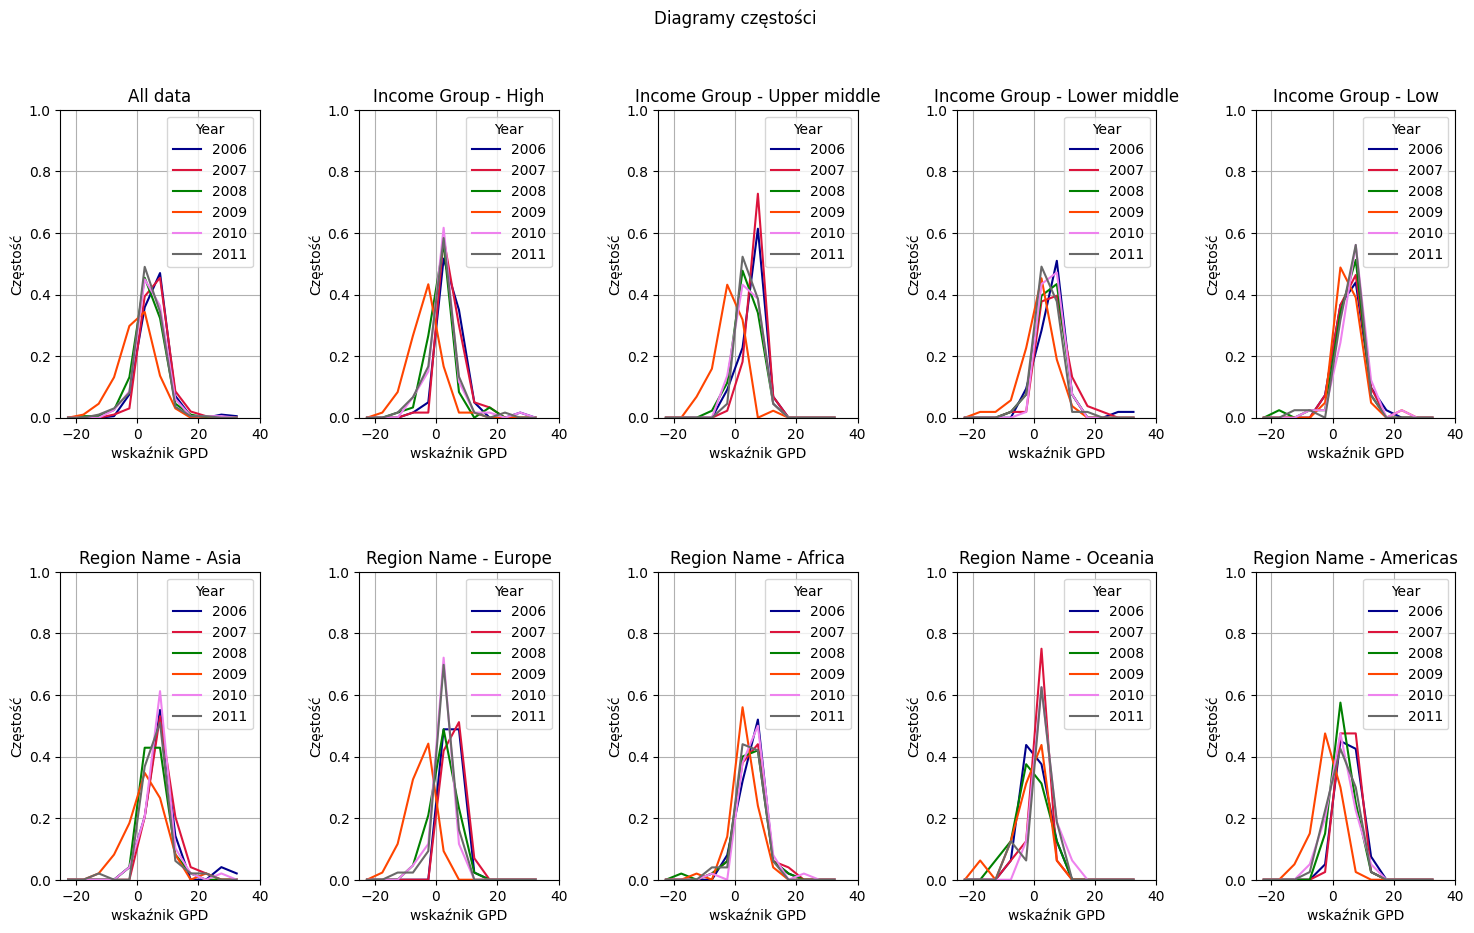

In [13]:
# YOUR CODE HERE
fig, ax = plt.subplots(2, 5, figsize = (18, 10), facecolor = "white")
fig.suptitle("Diagramy częstości")

bins = np.arange(-25, 40, 5)
def PlotTemp(ax, data_y, title):
    sns.histplot(data_y["2006"], color = "darkblue", ax = ax, element = "poly", fill = False, stat = "probability", bins = bins, label = "2006")
    sns.histplot(data_y["2007"], color = "crimson", ax = ax, element = "poly", fill = False, stat = "probability", bins = bins, label = "2007")
    sns.histplot(data_y["2008"], color = "green", ax = ax, element = "poly", fill = False, stat = "probability", bins = bins, label = "2008")
    sns.histplot(data_y["2009"], color = "orangered", ax = ax, element = "poly", fill = False, stat = "probability", bins = bins, label = "2009")
    sns.histplot(data_y["2010"], color = "violet", ax = ax, element = "poly", fill = False, stat = "probability", bins = bins, label = "2010")
    sns.histplot(data_y["2011"], color = "dimgray", ax = ax, element = "poly", fill = False, stat = "probability", bins = bins, label = "2011")
    ax.set_xlabel("wskaźnik GPD")
    ax.set_ylabel("Częstość", labelpad = 3)
    ax.grid(True)
    ax.set_xlim([-25,40])
    ax.set_ylim([0,1])
    ax.set_title(title)
    ax.legend(title = "Year")
    plt.subplots_adjust(wspace = 0.5, hspace = 0.5)

#górny wiersz 
PlotTemp(ax[0,0], recession_data_1, "All data")
IncomeGroup = ['High', 'Upper middle', 'Lower middle', 'Low']
for i in range(4):
    PlotTemp(ax[0, i+1], recession_data_1[recession_data_1['Income Group']  == IncomeGroup[i]], f"Income Group - {IncomeGroup[i]}")

#dolny wiersz 
regions = ['Asia', 'Europe', 'Africa', 'Oceania', 'Americas']
for i in range(5):
    PlotTemp(ax[1, i], recession_data_1[recession_data_1['Region Name']  == regions[i]], f"Region Name - {regions[i]}")

#### b) Inne typy wykresów
Bazując na wczytanych do notatnika danych przygotuj wykresy typu boxplot, violinplot, swarmplot i stripplot.

W przypadku każdego z typów wykresów zestaw wyniki na pojedynczej figurze (siatka wykresów 3x1). W górnym wierszu zawszyj wykres skonstruowany w oparciu o całość danych, w wierszu środkowym wykres zawierajacy podział na poszczególne stopnie zamożności, a w wierszu dolnym wykres zawierajacy podział na poszczególne rejony geograficzne. Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw identyczne zakresy wartości na odpowiadających sobie osiach wszystkich wykresów,
- na górnych wykresach dla całości danych użyj pojedynczego koloru jako wypełnienia,
- dla stopni zamożności ustaw jako wypełnienie skalę kolorów coolwarm,
- poszczególnym rejonom geograficznym przypisz jasne/wypłowiałe wersje kolorów przypisanych im na fladze olimpijskiej (Afryka szary, Europa jasnoniebieski itd.),
- w przypadku wykresów swarmplot i stripplot dobierz ich parametry tak by chmury punktów powiązanych z opisanymi w legendzie wariantami parametrów były rozdzielone,
- do dwóch dolnych wykresów dodaj legendę zawierającą nazwę wizualizowanego parametru oraz kolory przypisane poszczególnym rejonom geograficznym/stopniom zamożności w taki sposób, aby nie zasłaniała znajdujących się na wykresach danych.

Wykresy pudełkowe powinny zawierać oznaczenia wartości średniej, mediany oraz wartości odstających.

Uwaga! Zadanie należy wykonać w oparciu o wczytane do notatnika szeregi szczegółowe, a nie w oparciu o szeregi rozdzielcze częstości przygotowane w zadaniu 2.

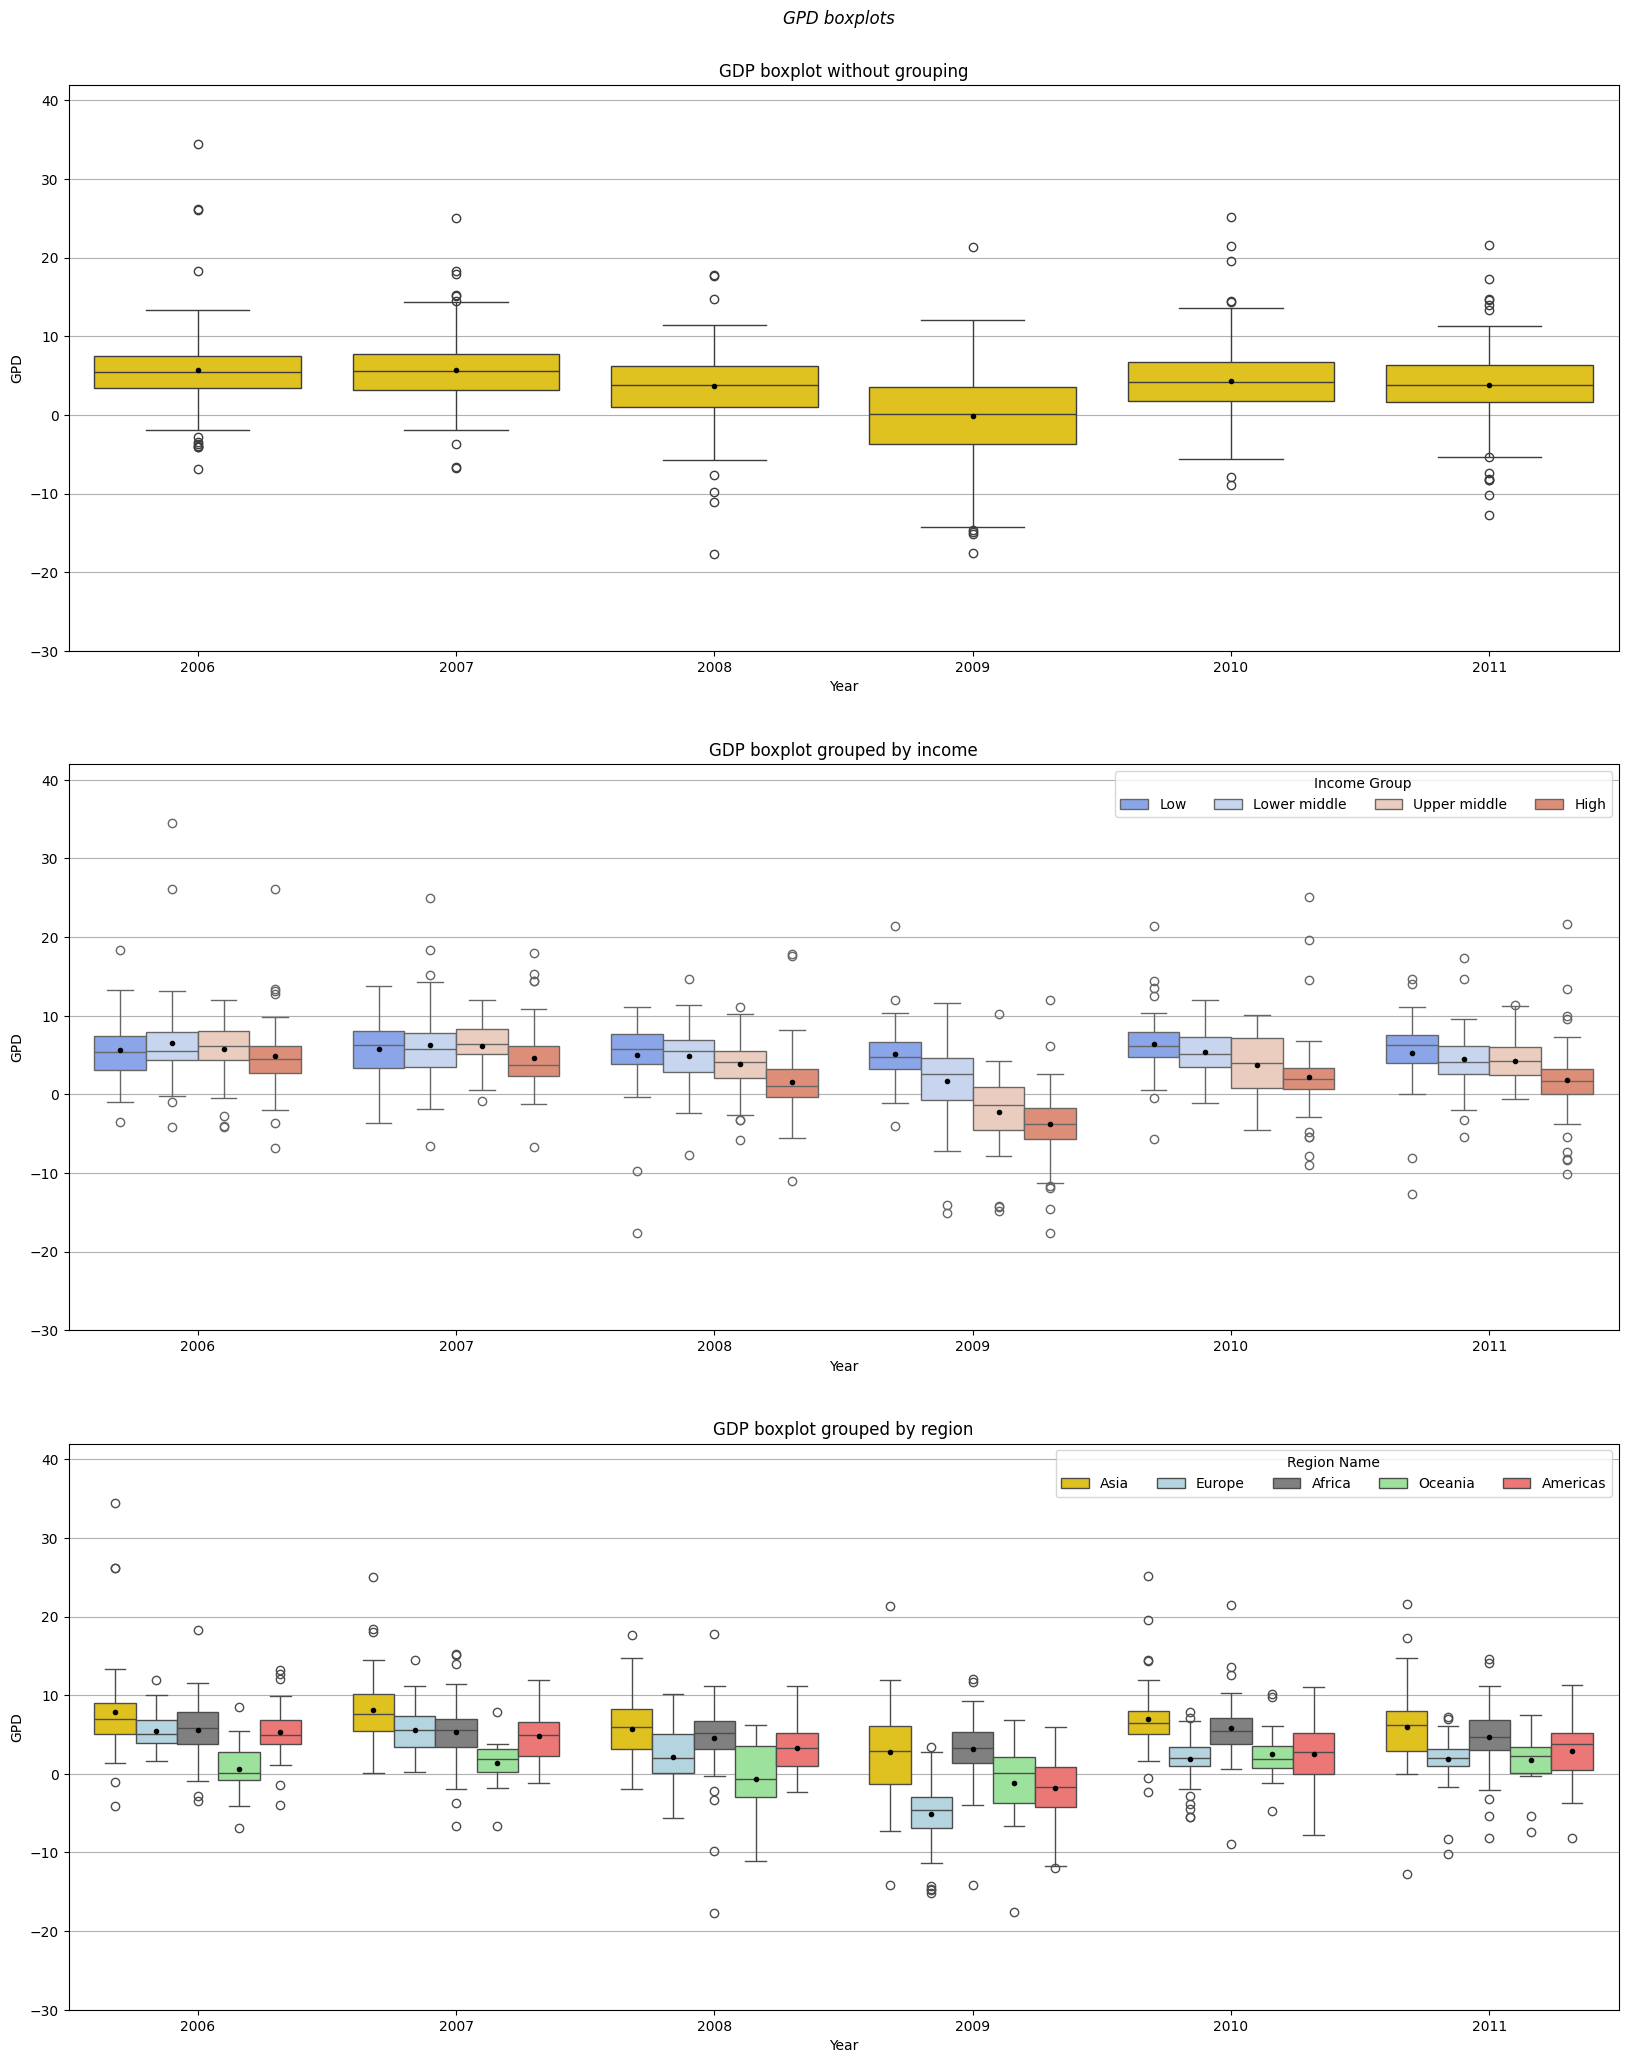

In [151]:
# Boxplot
# YOUR CODE HERE
fig, ax = plt.subplots(3,1, figsize = (20, 25))
region_color_palette = {
    'Asia': 'gold',
    'Africa': 'grey',
    'Europe': 'lightblue',
    'Oceania': 'lightgreen',
    'Americas' : '#FF6464'
}
plt.suptitle('GPD boxplots', x = 0.51, y = 0.91, style = 'italic')

ax[0].set_ylim(-30, 42)
sns.boxplot(data = recession_data_1, ax = ax[0], color='gold', showmeans = True, meanprops = {"marker":"o", "markerfacecolor":"black", "markeredgecolor":"black", "markersize":"3"})
ax[0].set_xlabel('Year')
ax[0].set_ylabel('GPD')
ax[0].set_title('GDP boxplot without grouping')
ax[0].grid(axis = 'y')

data_income = pd.melt(recession_data_1[['Income Group', '2006', '2007', '2008', '2009', '2010', '2011']], 'Income Group', var_name = 'Year', value_name = 'GPD')
ax[1].set_ylim(-30, 42)
sns.boxplot(data = data_income, ax = ax[1], hue = 'Income Group', x = 'Year', y = 'GPD', palette = 'coolwarm', showmeans = True, meanprops = {"marker":"o", "markerfacecolor":"black", "markeredgecolor":"black", "markersize":"3"})
ax[1].legend(ncol = 4, title = 'Income Group')
ax[1].set_title('GDP boxplot grouped by income')
ax[1].grid(axis = 'y')

data_region = pd.melt(recession_data_1[['Region Name', '2006', '2007', '2008', '2009', '2010', '2011']], 'Region Name', var_name = 'Year', value_name = 'GPD')
ax[2].set_ylim(-30, 42)
sns.boxplot(data = data_region, ax = ax[2], hue = 'Region Name', x = 'Year', y = 'GPD', palette = region_color_palette, showmeans = True, meanprops = {"marker":"o", "markerfacecolor":"black", "markeredgecolor":"black", "markersize":"3"})
ax[2].legend(ncol = 5, title = 'Region Name')
ax[2].set_title('GDP boxplot grouped by region')
ax[2].grid(axis = 'y')

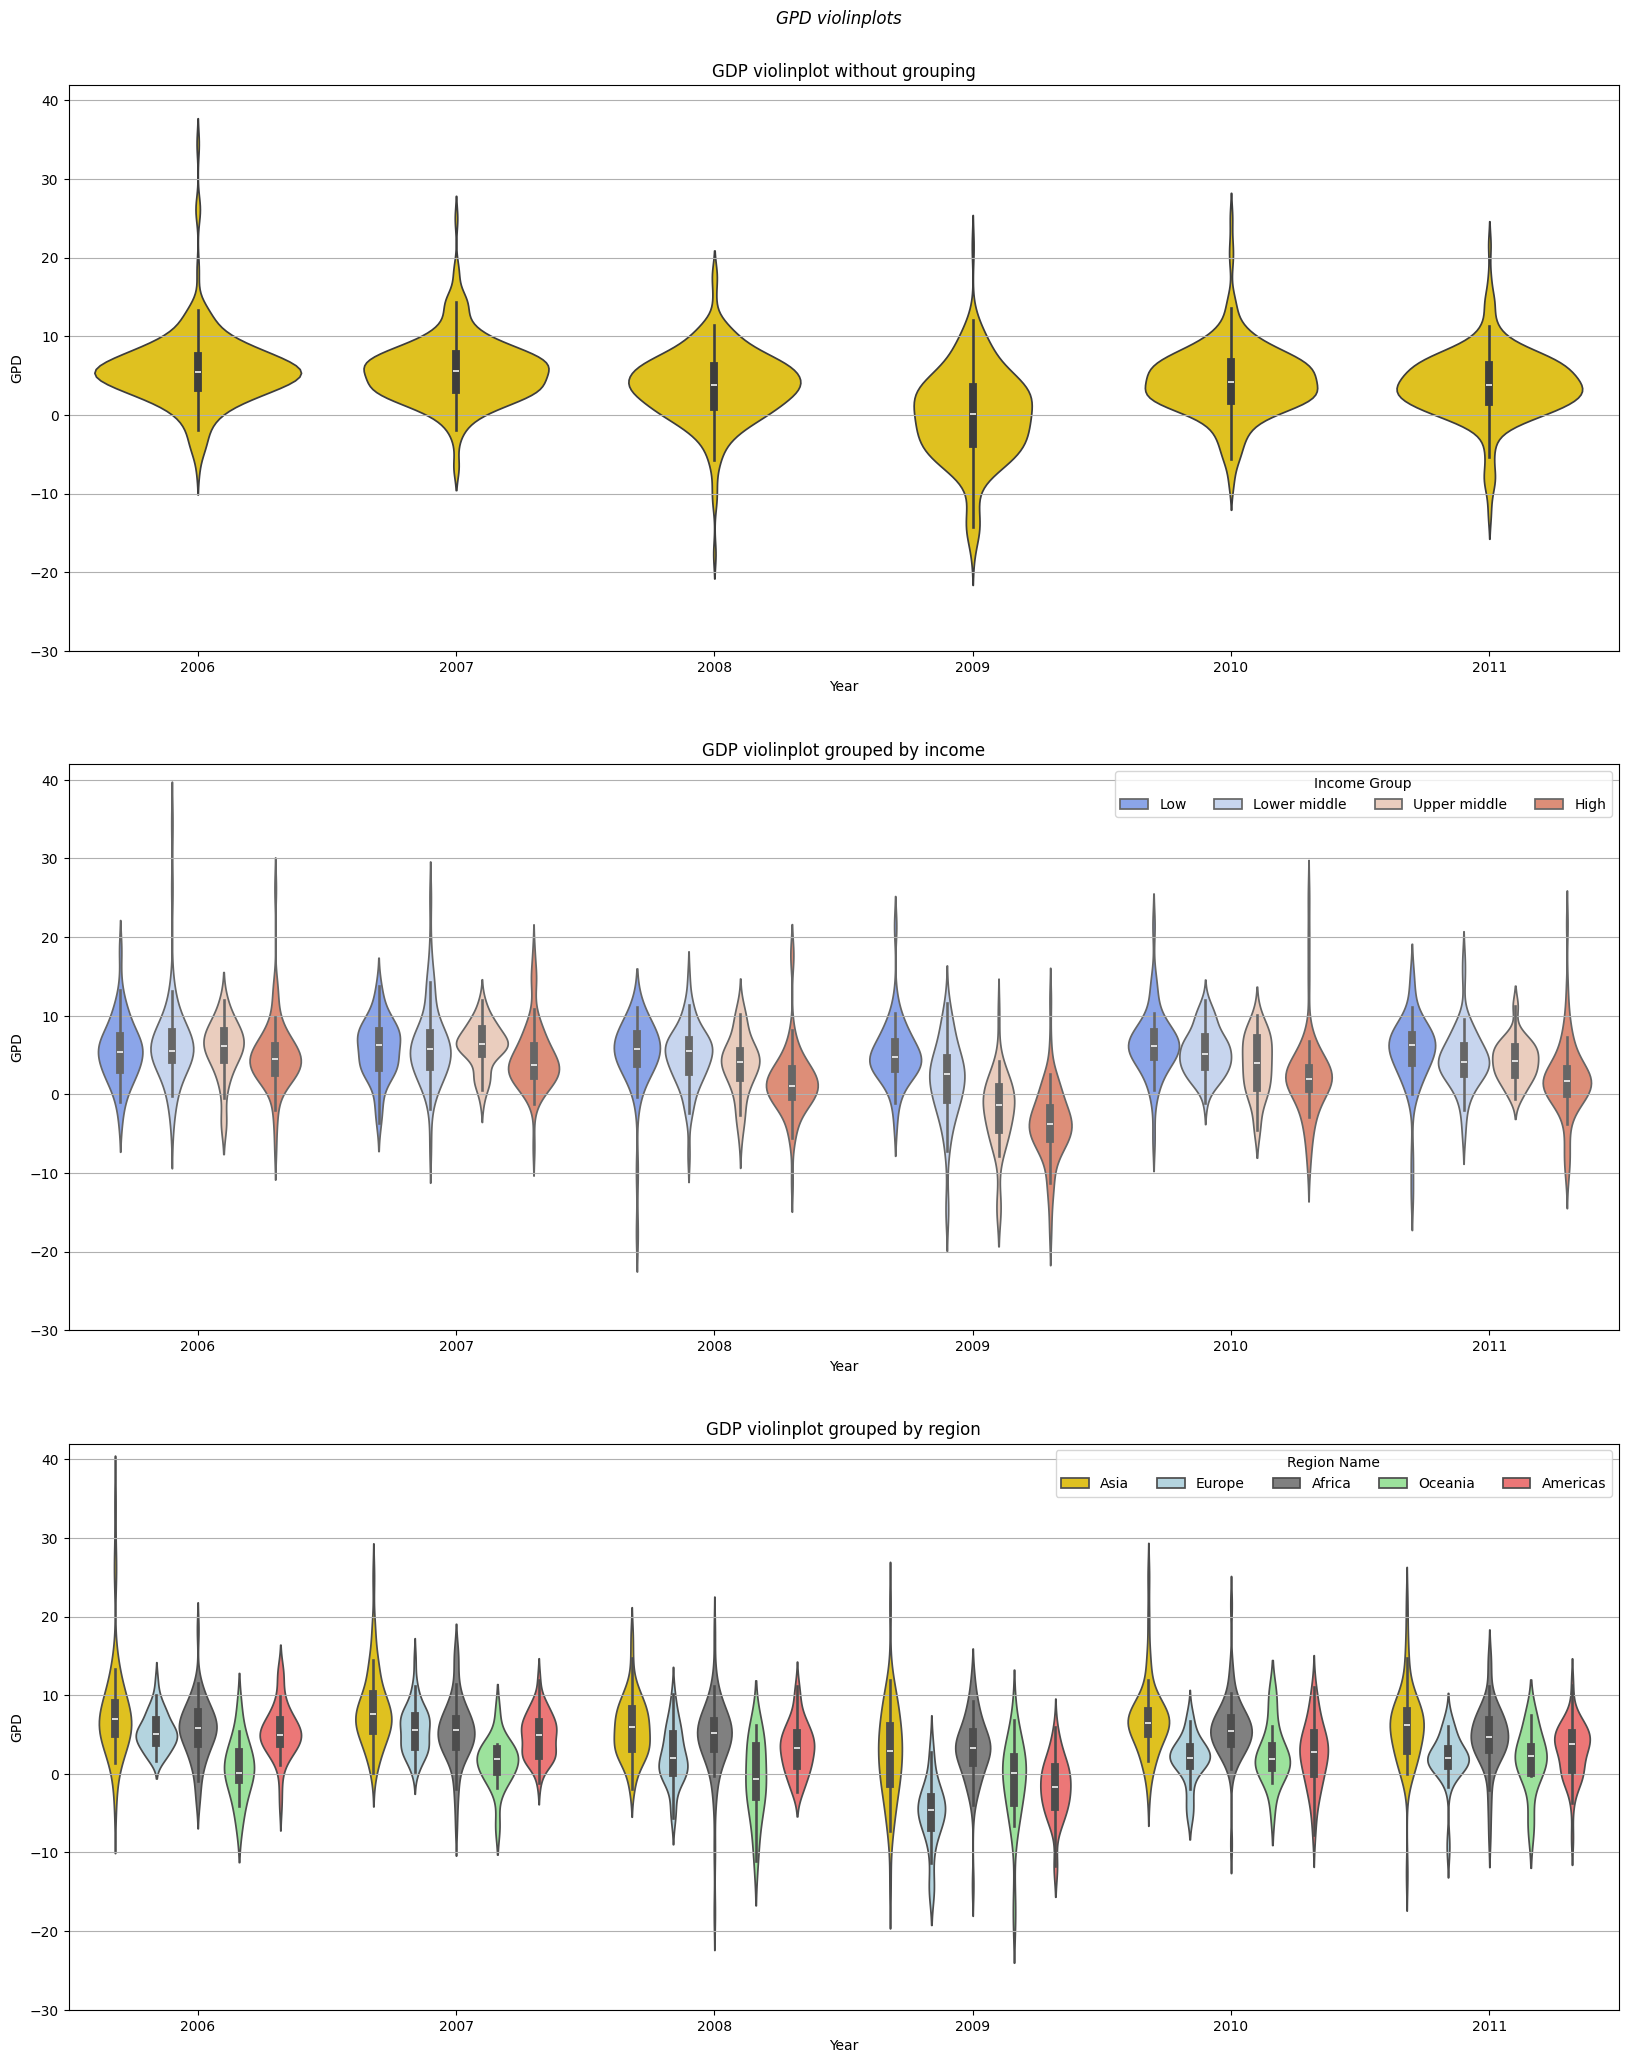

In [152]:
# Violinplot
# YOUR CODE HERE
fig, ax = plt.subplots(3,1, figsize = (20, 25))

plt.suptitle('GPD violinplots', x = 0.51, y = 0.91, style = 'italic')

ax[0].set_ylim(-30, 42)
sns.violinplot(data = recession_data_1, ax = ax[0], color='gold')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('GPD')
ax[0].set_title('GDP violinplot without grouping')
ax[0].grid(axis = 'y')

data_income = pd.melt(recession_data_1[['Income Group', '2006', '2007', '2008', '2009', '2010', '2011']], 'Income Group', var_name = 'Year', value_name = 'GPD')
ax[1].set_ylim(-30, 42)
sns.violinplot(data = data_income, ax = ax[1], hue = 'Income Group', x = 'Year', y = 'GPD', palette = 'coolwarm')
ax[1].legend(ncol = 4, title = 'Income Group')
ax[1].set_title('GDP violinplot grouped by income')
ax[1].grid(axis = 'y')

data_region = pd.melt(recession_data_1[['Region Name', '2006', '2007', '2008', '2009', '2010', '2011']], 'Region Name', var_name = 'Year', value_name = 'GPD')
ax[2].set_ylim(-30, 42)
sns.violinplot(data = data_region, ax = ax[2], hue = 'Region Name', x = 'Year', y = 'GPD', palette = region_color_palette)
ax[2].legend(ncol = 5, title = 'Region Name')
ax[2].set_title('GDP violinplot grouped by region')
ax[2].grid(axis = 'y')

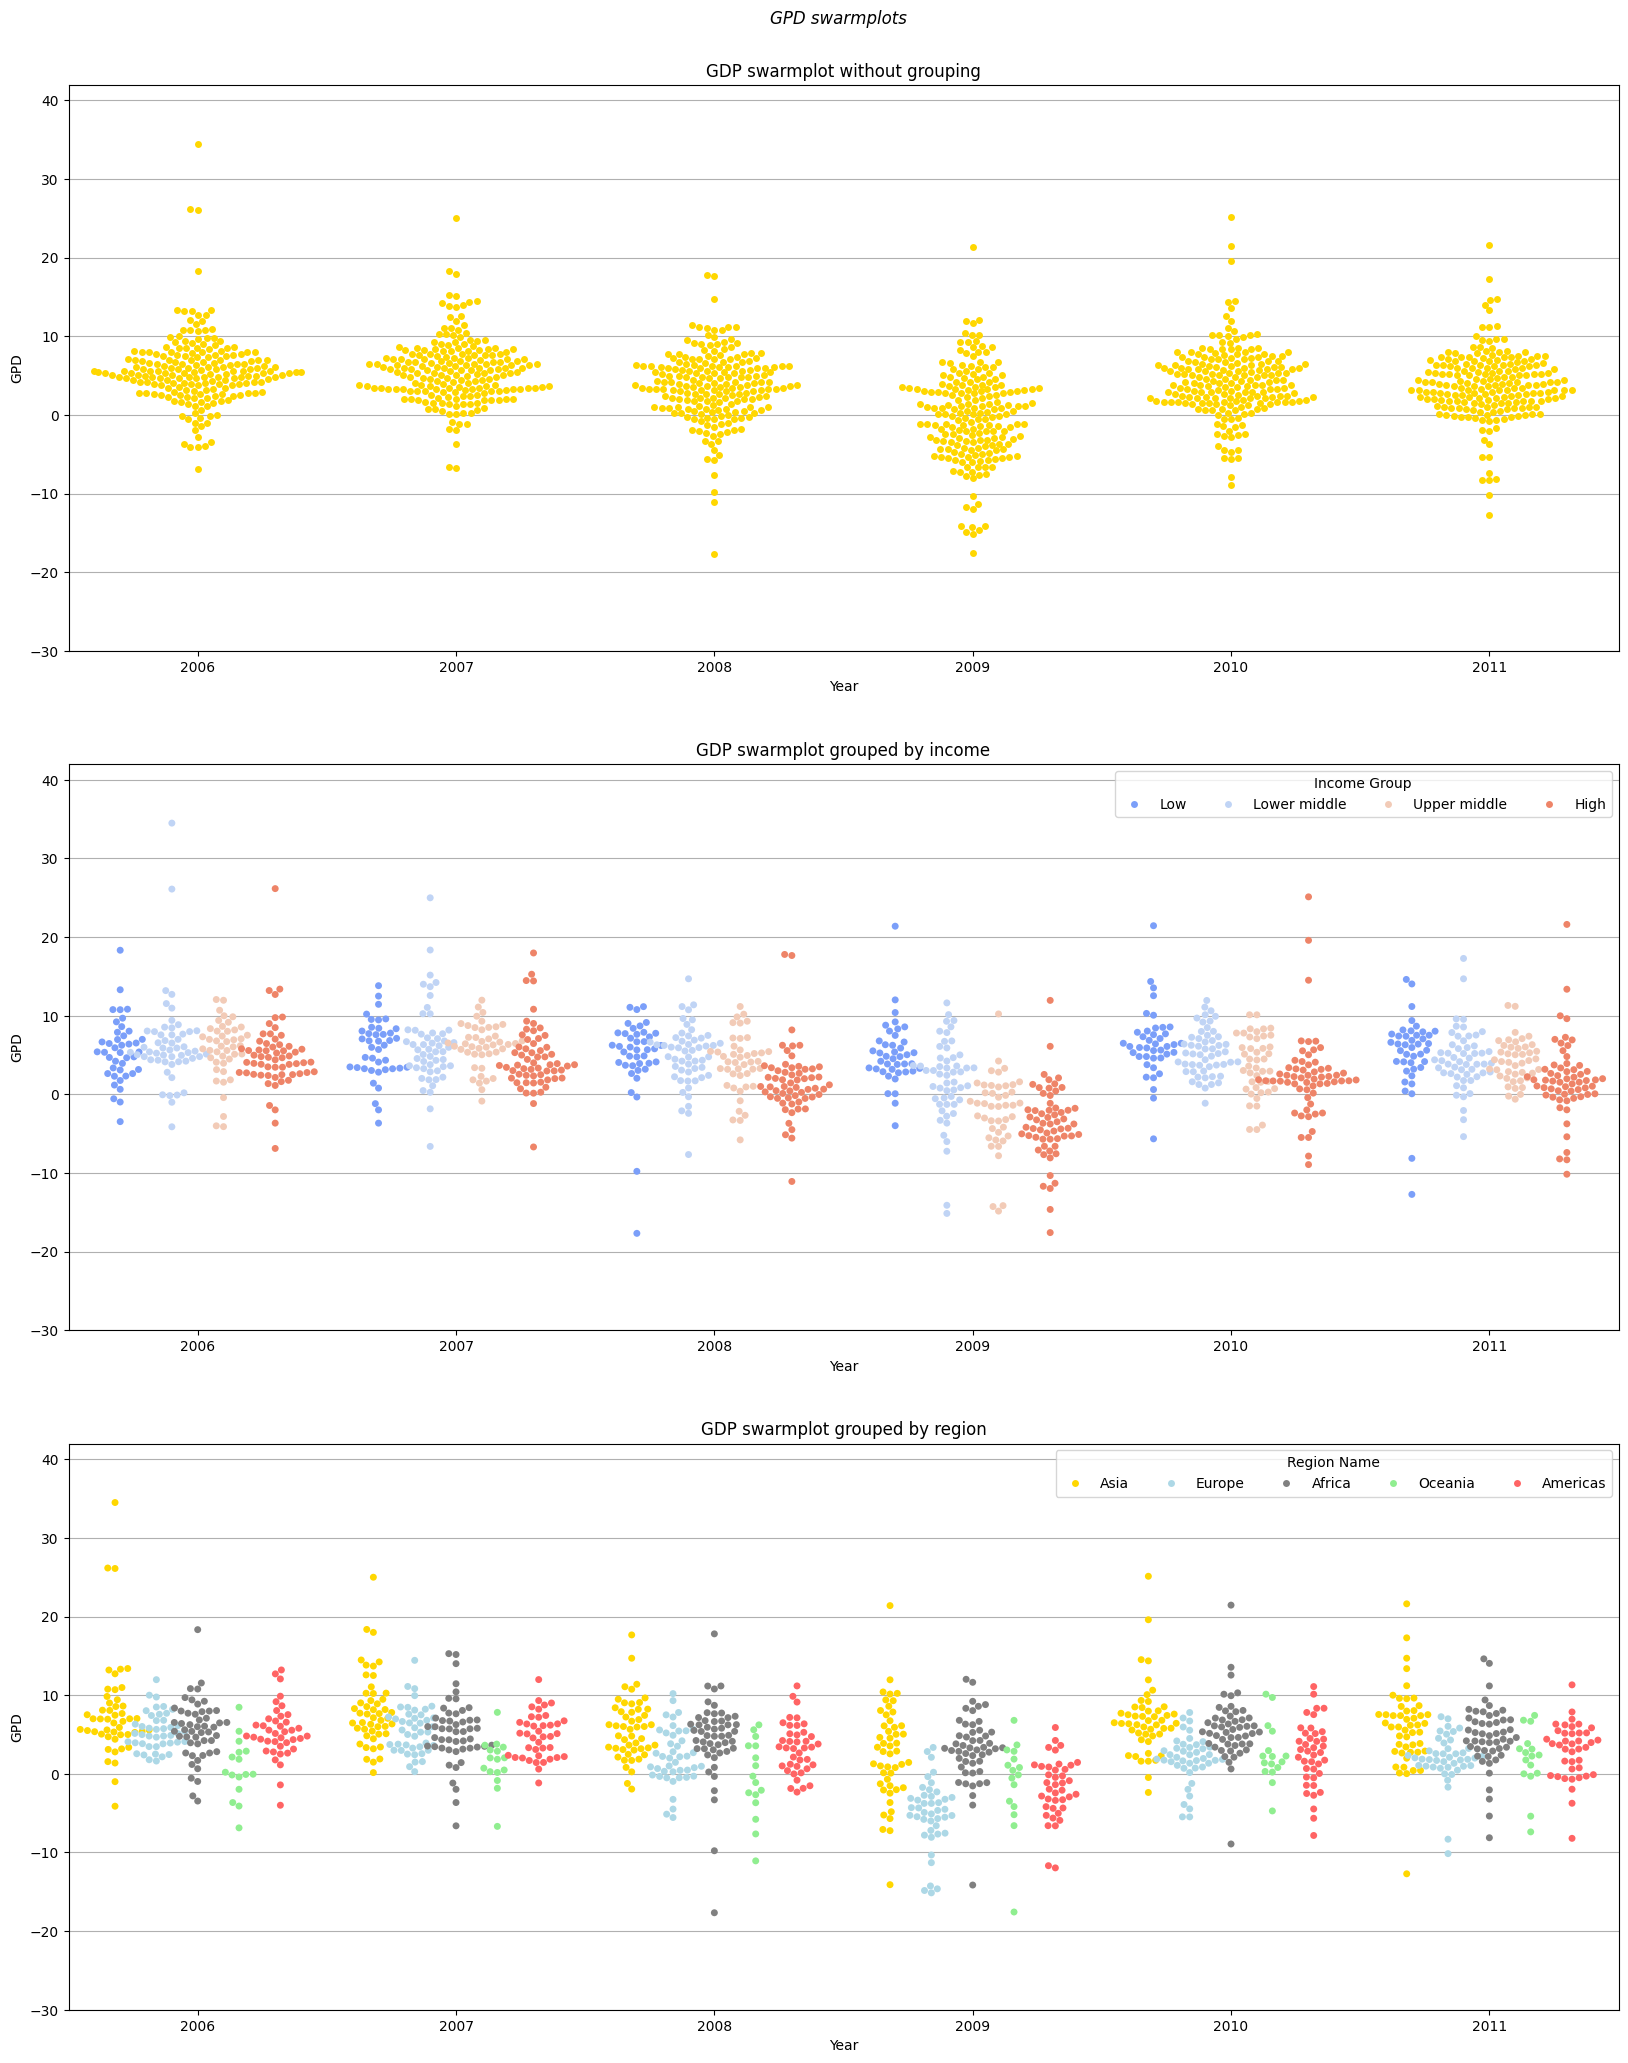

In [150]:
# Swarmplot
# YOUR CODE HERE
fig, ax = plt.subplots(3,1, figsize = (20, 25))

plt.suptitle('GPD swarmplots', x = 0.51, y = 0.91, style = 'italic')

ax[0].set_ylim(-30, 42)
sns.swarmplot(data = recession_data_1, ax = ax[0], color='gold')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('GPD')
ax[0].set_title('GDP swarmplot without grouping')
ax[0].grid(axis = 'y')

data_income = pd.melt(recession_data_1[['Income Group', '2006', '2007', '2008', '2009', '2010', '2011']], 'Income Group', var_name = 'Year', value_name = 'GPD')
ax[1].set_ylim(-30, 42)
sns.swarmplot(data = data_income, ax = ax[1], hue = 'Income Group', x = 'Year', y = 'GPD', palette = 'coolwarm', dodge = True)
ax[1].legend(ncol = 4, title = 'Income Group')
ax[1].set_title('GDP swarmplot grouped by income')
ax[1].grid(axis = 'y')

data_region = pd.melt(recession_data_1[['Region Name', '2006', '2007', '2008', '2009', '2010', '2011']], 'Region Name', var_name = 'Year', value_name = 'GPD')
ax[2].set_ylim(-30, 42)
sns.swarmplot(data = data_region, ax = ax[2], hue = 'Region Name', x = 'Year', y = 'GPD', palette = region_color_palette, dodge = True)
ax[2].legend(ncol = 5, title = 'Region Name')
ax[2].set_title('GDP swarmplot grouped by region')
ax[2].grid(axis = 'y')

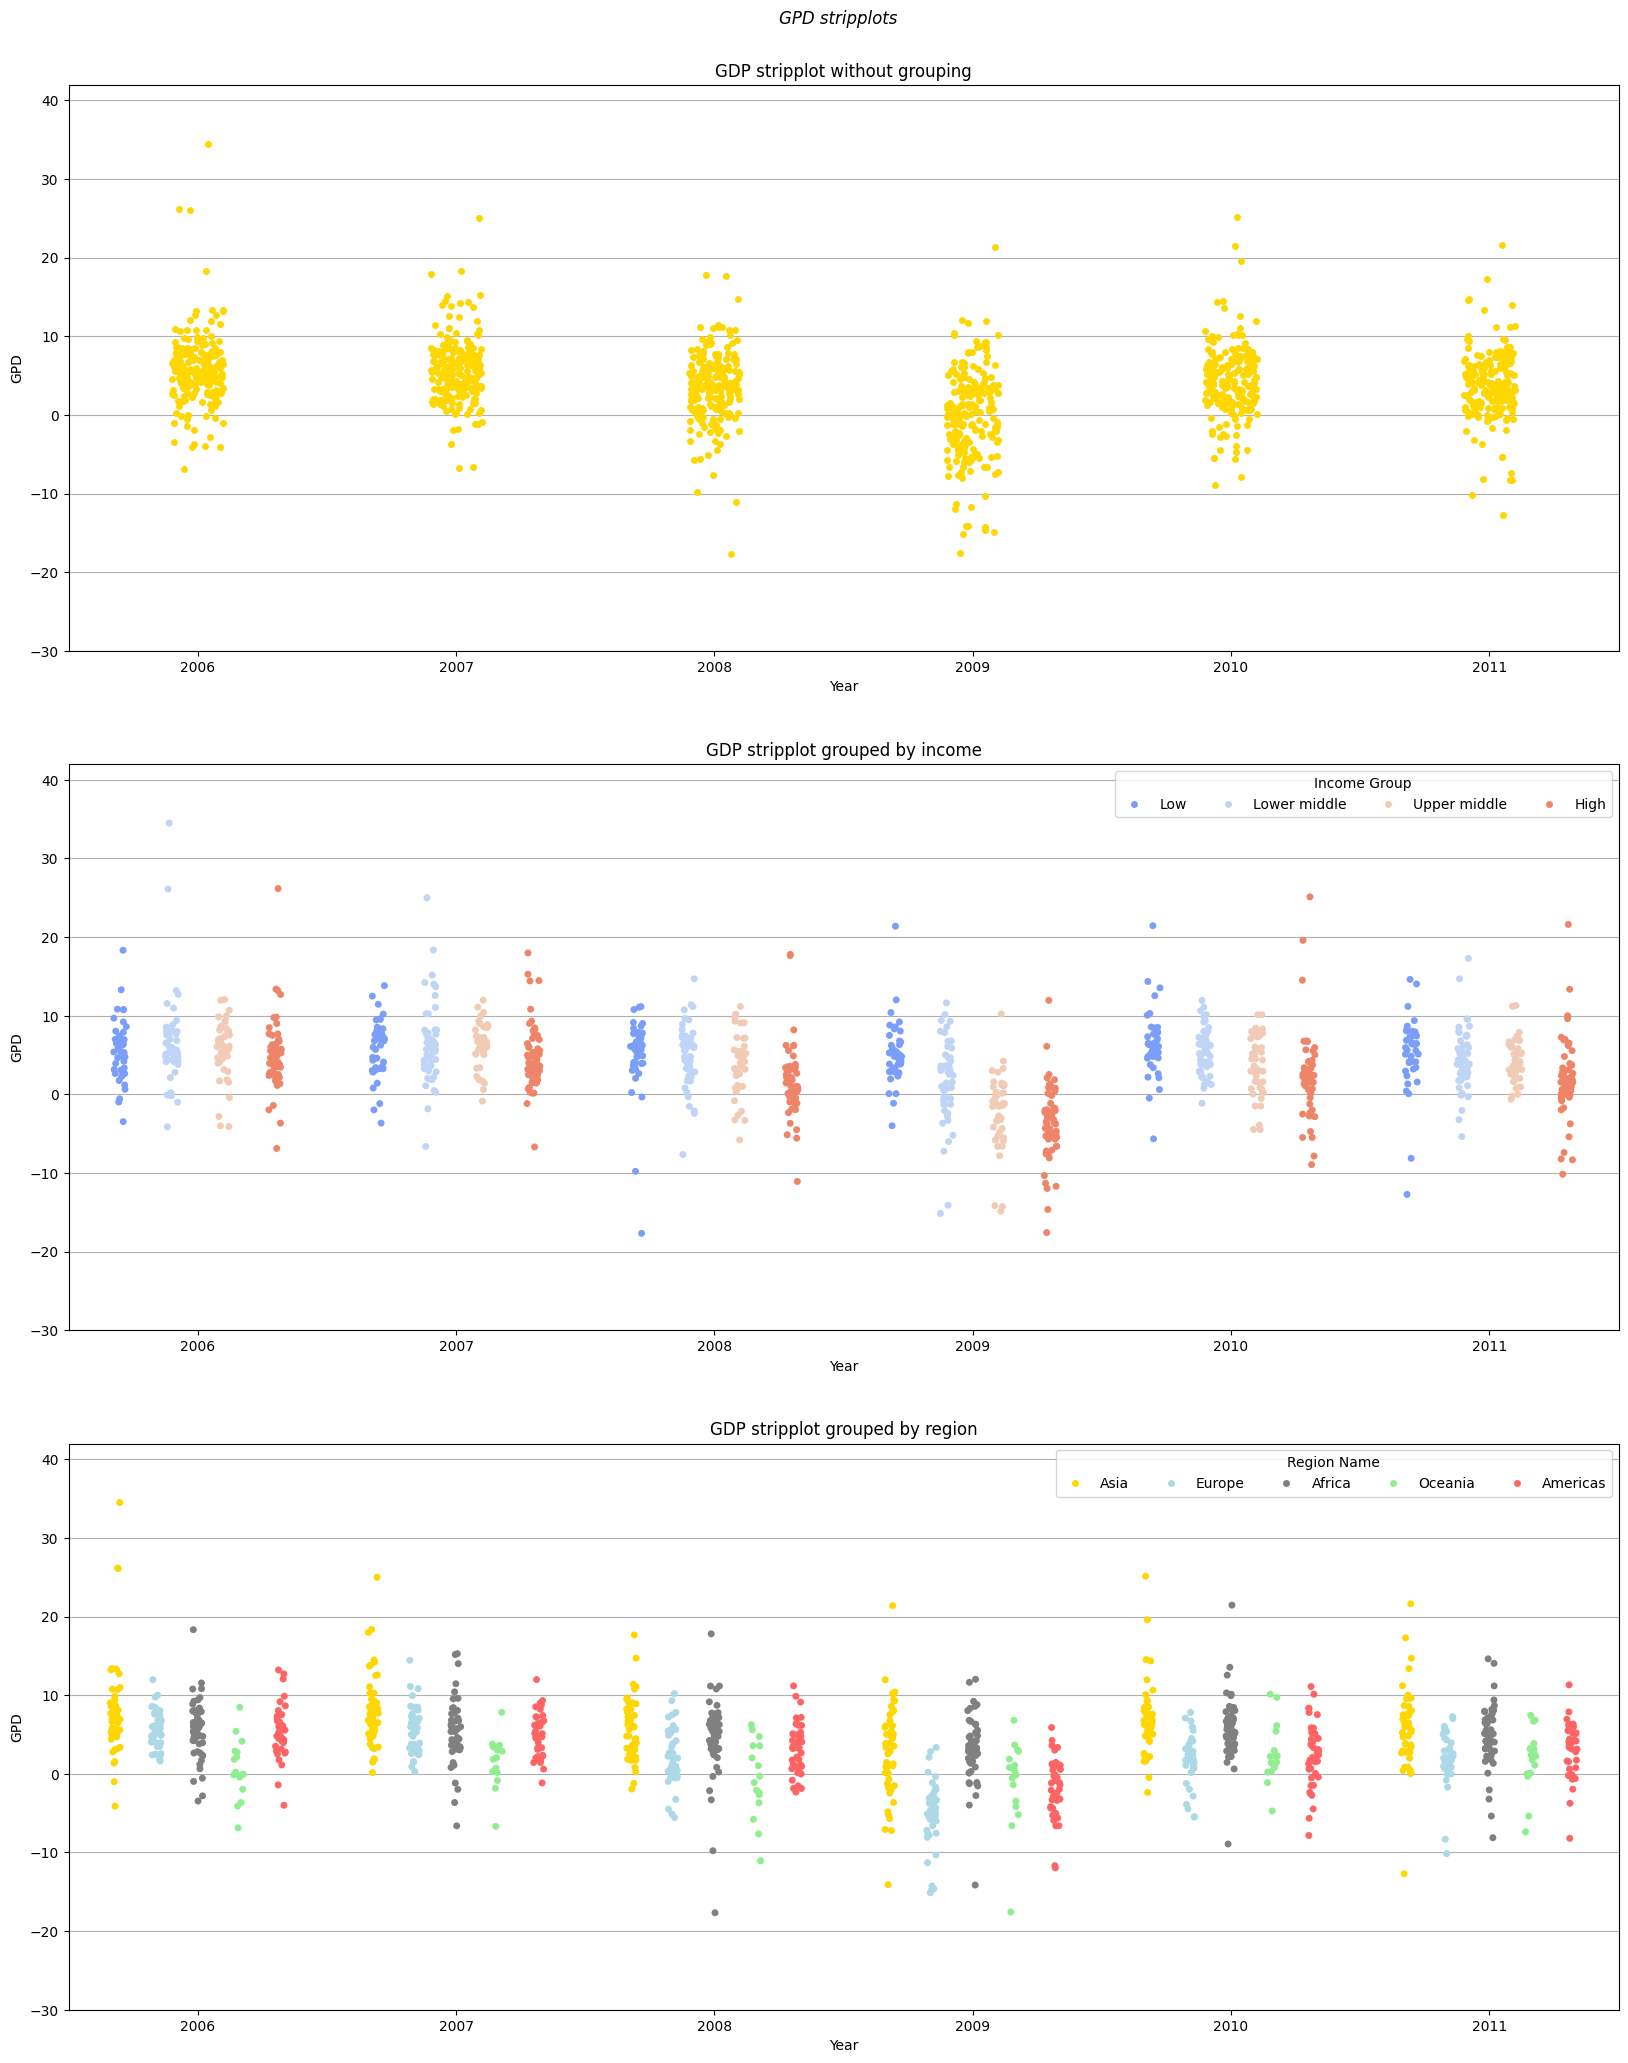

In [154]:
# Stripplot
# YOUR CODE HERE
fig, ax = plt.subplots(3,1, figsize = (20, 25))

plt.suptitle('GPD stripplots', x = 0.51, y = 0.91, style = 'italic')

ax[0].set_ylim(-30, 42)
sns.stripplot(data = recession_data_1, ax = ax[0], color='gold')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('GPD')
ax[0].set_title('GDP stripplot without grouping')
ax[0].grid(axis = 'y')

data_income = pd.melt(recession_data_1[['Income Group', '2006', '2007', '2008', '2009', '2010', '2011']], 'Income Group', var_name = 'Year', value_name = 'GPD')
ax[1].set_ylim(-30, 42)
sns.stripplot(data = data_income, ax = ax[1], hue = 'Income Group', x = 'Year', y = 'GPD', palette = 'coolwarm', dodge = True)
ax[1].legend(ncol = 4, title = 'Income Group')
ax[1].set_title('GDP stripplot grouped by income')
ax[1].grid(axis = 'y')

data_region = pd.melt(recession_data_1[['Region Name', '2006', '2007', '2008', '2009', '2010', '2011']], 'Region Name', var_name = 'Year', value_name = 'GPD')
ax[2].set_ylim(-30, 42)
sns.stripplot(data = data_region, ax = ax[2], hue = 'Region Name', x = 'Year', y = 'GPD', palette = region_color_palette, dodge = True)
ax[2].legend(ncol = 5, title = 'Region Name')
ax[2].set_title('GDP stripplot grouped by region')
ax[2].grid(axis = 'y')

#### c) Dyskusja wyników

Zastanów się jakie są mocne i słabe strony poszczególnych typów wykresów wykonanych w tym zadaniu. W jakich przypadkach wykorzystanie konkretnych typów wykresów do wizualizacji może sprawiać problemy?

<font size="4">**1. Diagramy częstości**</font>

Do mocnych stron należy przede wszystkim możliwość łatwego prezentowania częstości dla danych kategorycznych, dane są łatwe do interpretacji. Przy dużej ilości danych w każdej grupie, wykres może zrobić się nie czytelny, co z pewnością jest wadą tego rodzaju wykresów. Jeśli osie nie są odpowiednio dobrane, może to prowadzić to niepoprawnego skalowania i odczytu danych. Trzeba także pamiętać o dobrym doborze kolorów aby linie były odróżnialne, w przeciwnym wypadku prawidłowe odczytanie zależności z wykresu może być niemożliwe.

<font size="4">**2. Boxplot**</font>

Mocną stroną wykresów pudełkowych jest prostota odczytywania informacji na temat rozkładów danych, takich jak warinacja, mediana czy kwartyle. Bardzo ułatwia również wykrywanie nietypowych punktów danych, dzięki jasno zaznaczonym punktom odstjącym. Również wizulizacja rozkładów dla róznych grup danych jest bardzo prosta i przejrzysta. Wykresy pudełkowe są więc bardzo dobrym wyborem, jeśli interesują nas podstawowe statystyki ogólne dotyczące zbiorów danych. Problematycznym jednak jest brak dostępu do szczegółowych wartości rozkładu danych, które nie są widoczne na takim wykresie. 

<font size="4">**3. Violinplot**</font>

Wykres tego typu łączy w sobie cechy boxplota z rozkładem gęstości, tak więc pozwala nam zoabczyć kształ rozkładu danych, czego brak jest problemem w przypadku rozkładu pudełkowego. Jednak połączenie tego na jedym wykresie może wiązać się ze słabszą jego czytelnością. Szczególnie problematyczne wydaje się odczytanie wartości odstających, które "rozciagają" wykres gęstości, a nie są jasno, punktowo zwizualizowane, jak w przypadku boxplota. Wykres tego typu wydaje się dobrym, kiedy interesuje nas bardziej ogólna wizulizacja dotycząca kształtu rozkładu danych, łącznie z ich podstawowymi statystykami opisowymi, jednak nie sprawdzi się aż tak dobrze, gdy będą interesować nas bardziej szczegółowe informacje, widoczne za to na diagramch pudełkowych i częstości. 

<font size="4">**4. Swarmplot**</font>

Swarmplot wyróznia się od poprzednich przede wszytskim tym, że widoczne są na nim punkty z analizowanego zestawu danych, co pozwala na dokładniejsze zobaczenie miejsc przerzedzenia czy zagęszczenia punktów danych. Bardzo dobrze sprawdza się również przy porówaniu ilości punktów danych użytych do tworzenia rozkładów dla różnych kategorii. Bardzo dobrze na takim wykresie można wyznaczyć puknty odstajace, jednak inne statystyki, takie jak mediana czy kwartyle, nie są już tak oczywiste do odczytania, jak na wykresie pudełkowym, czy nawet na violinplotach. Problemem również może okazać się czytelność dla dużych zestawów danych. 

<font size="4">**5. Stripplot**</font>

Wykres typu strip, podobnie jak swarmplot, przedstawia punkty z zestawu danych, jednak w jego przypadku punkty mogą na siebie nachodzić. Z taką formą przedstawienia danych może wiązać się nieco łatwiejsze wyznaczenie niektórych statystyk (wykres bardziej przypomina kształtem ten z boxplot), jednak już wyznaczenie konkretniejszych miejsc zagęszczenia/przerzedzenia nie jest tak widoczne jak w przypadku swarmplot. O ile w przypadku swarmplot wadą mogło być nachodzenie na siebie danych z różnych grup, tutaj za to nie wydaje się to stanowić problemu. 